In [ ]:
# adding langsmith and openai api keys in the environment

import os, getpass

def _set_env(var: str):
    # Check if the variable is set in the OS environment
    env_value = os.environ.get(var)
    if not env_value:
        # If not set, prompt the user for input
        env_value = getpass.getpass(f"{var}: ")
    
    # Set the environment variable for the current process
    os.environ[var] = env_value



# _set_env("LANGCHAIN_API_KEY")
# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

_set_env("OPENAI_API_KEY")
_set_env("TIMESCALE_DB_URI")
_set_env("TAVILY_API_KEY")


OPENAI_API_KEY:  ········
TIMESCALE_DB_URI:  ········
TAVILY_API_KEY:  ········


In [26]:
import fitz  # PyMuPDF
import pandas as pd
import csv

def pdf_to_csv(pdf_path: str,
               csv_path: str,
               subject: str,
               sub_subject: str,
               book_name: str,
               author_name: str,
               extra_metadata: dict = None):
    """
    Extracts each page of the PDF into rows of a CSV with metadata columns.
    
    :param pdf_path: path to input PDF
    :param csv_path: path to output CSV
    :param subject: top-level subject (e.g. "Physics")
    :param sub_subject: more specific topic (e.g. "Quantum Mechanics")
    :param book_name: title of the book
    :param author_name: name of the author
    :param extra_metadata: dict of any other constant metadata columns you want
    """
    # Prepare list to collect rows
    records = []
    doc = fitz.open(pdf_path)
    
    # Default extra metadata
    extra_metadata = extra_metadata or {}
    
    for page_index in range(len(doc)):
        page = doc.load_page(page_index)
        text = page.get_text().strip()
        word_count = len(text.split())
        
        row = {
            "subject": subject,
            "sub_subject": sub_subject,
            "book_name": book_name,
            "author_name": author_name,
            "page_number": page_index + 1,
            "word_count": word_count,
            "text": text,
        }
        # merge in any extra constant metadata
        row.update(extra_metadata)
        records.append(row)
    
    # Create DataFrame and write CSV
    df = pd.DataFrame.from_records(records)
    # Reorder columns if you like:
    cols = ["subject", "sub_subject", "book_name", "author_name"] \
           + sorted(set(df.columns) - {"subject","sub_subject","book_name","author_name"})            
    df = df[cols]

    df.to_csv(
    csv_path,
    index=False,
    encoding="utf-8",
    quoting=csv.QUOTE_ALL,
    escapechar='\\'
    )

#    df.to_csv(csv_path, index=False, encoding="utf-8")
    print(f"Wrote {len(df)} pages to {csv_path}")


In [27]:
# # ── Example usage ──
# if __name__ == "__main__":
#     pdf_path     = "your_book.pdf"
#     output_csv   = "book_pages.csv"
#     subject      = "Physics"
#     sub_subject  = "Quantum Mechanics"
#     book_name    = "Introduction to Quantum Theory"
#     author_name  = "Jane Doe"
#     extra_meta   = {
#         "publication_year": 2021,
#         "publisher": "Acme Academic Press"
#     }
    
pdf_to_csv(pdf_path=      './data/The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics.pdf',
           csv_path=      './data/feynman_vol_3_chunked.csv',
           subject=       'Physics',
           sub_subject=   'Quantum Mechanics',
           book_name=     'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics',
           author_name=   'Richard Feynman',
           extra_metadata=None)


Wrote 688 pages to ./data/feynman_vol_3_chunked.csv


In [28]:
# pdf_path = './data/The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics.pdf'
# doc      = fitz.open(pdf_path)


In [29]:
# doc

In [30]:
# for page_index in range(10):
#     print(doc.load_page(page_index))
#     print(doc.load_page(page_index).get_text().strip())
#     print('\n\n\n\n')
    

## Creating embeddings

In [ ]:
# df_whole_book = pd.read_csv('./data/feynman_vol_3_chunked.csv', sep=',')
# df_whole_book

In [ ]:
# import openai

# # Set your API key
# openai.api_key = os.environ.get('OPENAI_API_KEY')

# # The text you want to embed
# text = "OpenAI embeddings are powerful!"

# # Make the API call
# # embedding dim = 1536 | is model ka output | u cant swap final layer and give a different-dimensional output
# # The input must not exceed the max input tokens for the model (8192 tokens for`text-embedding-ada-002`, but for this it'll be diffrent)
# response = openai.embeddings.create(
#     input=[text],  # input can be a single string or list of strings
#     model="text-embedding-3-small")

# # Extract the embedding
# embedding = response.data[0].embedding

# print("Embedding vector:")
# print(embedding)


In [ ]:
# df_whole_book.dtypes

In [ ]:
# df_whole_book.text[3]

In [ ]:
# type(df_whole_book.text[3])

In [ ]:
# df_chap_1 = df_whole_book.iloc[28:47]
# df_chap_1

In [ ]:
# df_chap_1.text

In [ ]:
# list(df_chap_1.text)

In [ ]:
# len(list(df_chap_1.text))


In [ ]:
# chap_1_embedded = openai.embeddings.create(
#                                             input=list(df_chap_1.text),  # input can be a single string or list of strings
#                                             model="text-embedding-3-small"
#                                             )


In [ ]:
# len(chap_1_embedded.data)

In [ ]:
# list_of_embeddings = [i.embedding for i in chap_1_embedded.data]

In [ ]:
# len(list_of_embeddings)

In [ ]:
# df_chap_1['embeddings'] = list_of_embeddings


In [ ]:
# df_chap_1.reset_index(inplace=True, drop=True)
# df_chap_1

In [ ]:
# df_chap_1.to_csv('./data/chap_1_feynman_embedded.csv')


In [ ]:
# import pandas as pd

# df_chap_1 = pd.read_csv('./data/chap_1_feynman_embedded.csv', sep=',')
# df_chap_1


In [ ]:
# import uuid
# ids = [str(uuid.uuid4()) for i in range(len(df_chap_1.page_number))]
# ids


In [ ]:
# df_chap_1.drop(columns=['Unnamed: 0'], inplace=True)
# df_chap_1

In [ ]:
# df_chap_1.index = ids
# df_chap_1

In [ ]:
# df_chap_1

In [10]:
# df_chap_1.to_csv('./data/chap_1_feynman_embedded.csv')


In [9]:
# import pandas as pd

# df_chap_1 = pd.read_csv('./data/chap_1_feynman_embedded.csv', sep=',')
# df_chap_1


In [ ]:
# df_chap_1.rename(columns={'Unnamed: 0':'id'}, inplace=True)#,'text':'content','embeddings':'embedding'})
# df_chap_1


In [11]:
df_chap_1.head(4)


,id,subject,sub_subject,book_name,author_name,page_number,text,word_count,embeddings
0,ed7f8a03-87e8-4f66-a227-8115df44cdb5,Physics,Quantum Mechanics,The Feynman Lectures on Physics - Vol 3 - Quan...,Richard Feynman,29,Because atomic behavior is so unlike ordinary ...,297,"[-0.012086129747331142, 0.023089729249477386, ..."
1,2c027077-920a-46ef-a9ed-48282350a36a,Physics,Quantum Mechanics,The Feynman Lectures on Physics - Vol 3 - Quan...,Richard Feynman,30,"of bullets. It is not a very good gun, in that...",547,"[0.005632385145872831, -0.010357311926782131, ..."
2,e25847e6-0132-415c-a778-2a97644472a0,Physics,Quantum Mechanics,The Feynman Lectures on Physics - Vol 3 - Quan...,Richard Feynman,31,"small if x is very large. You may wonder, howe...",278,"[0.01162712275981903, 0.006917905528098345, 0...."
3,91e24446-c691-4e1f-b3aa-a4664306bf82,Physics,Quantum Mechanics,The Feynman Lectures on Physics - Vol 3 - Quan...,Richard Feynman,32,makes circular waves. To the right of the sour...,514,"[0.009899104945361614, 0.015257214196026325, -..."


# Creating Table in the database and storing data

In [43]:
# restructuring the dataframe iff needed

from pandas import DataFrame
from pandas import Series

def restructure_dataframe(unstructured_df: DataFrame) -> DataFrame:
    
    restructured_df = pd.DataFrame(columns=['id', 'metadata', 'contents', 'embedding'])
    
    for row in unstructured_df.iterrows():
        restructured_df.loc[len(restructured_df)] = {
                                                        'id':        row[1].id,
                                                        'metadata':  {'subject':row[1].subject, 'sub_subject':row[1].sub_subject, 'book_name':row[1].book_name, 'author_name':row[1].author_name, 'page_number':row[1].page_number, 'word_count':row[1].word_count },
                                                        'contents':  row[1].text,
                                                        'embedding': row[1].embeddings
                                                        }
    return restructured_df

res_df = restructure_dataframe(df_chap_1)
res_df.head(5)
    

,id,metadata,contents,embedding
0,ed7f8a03-87e8-4f66-a227-8115df44cdb5,"{'subject': 'Physics', 'sub_subject': 'Quantum...",Because atomic behavior is so unlike ordinary ...,"[-0.012086129747331142, 0.023089729249477386, ..."
1,2c027077-920a-46ef-a9ed-48282350a36a,"{'subject': 'Physics', 'sub_subject': 'Quantum...","of bullets. It is not a very good gun, in that...","[0.005632385145872831, -0.010357311926782131, ..."
2,e25847e6-0132-415c-a778-2a97644472a0,"{'subject': 'Physics', 'sub_subject': 'Quantum...","small if x is very large. You may wonder, howe...","[0.01162712275981903, 0.006917905528098345, 0...."
3,91e24446-c691-4e1f-b3aa-a4664306bf82,"{'subject': 'Physics', 'sub_subject': 'Quantum...",makes circular waves. To the right of the sour...,"[0.009899104945361614, 0.015257214196026325, -..."
4,117274b6-4764-4592-8b85-3b89d9ffbe9e,"{'subject': 'Physics', 'sub_subject': 'Quantum...",the detector will be the diﬀerence of the two ...,"[-0.0022454969584941864, 0.013245043344795704,..."


In [44]:
# needed to send records to database
records = res_df.to_records(index=False)


In [23]:
# setting up client to store/send data to database

from timescale_vector import client
import os

OPENAI_API_KEY   = os.getenv("OPENAI_API_KEY")
TIMESCALE_DB_URI = os.getenv("TIMESCALE_DB_URI")
TAVILY_API_KEY   = os.getenv("TAVILY_API_KEY")


# query = "Explain The uncertainty principle in Quantum Mechanics"


# query_embedding = openai.embeddings.create(
#                                             input=[query],  # input can be a single string or list of strings
#                                             model="text-embedding-3-small"
#                                             )


table_name     = 'embeddings_table'
embedding_dims = 1536

# creating client to handle db operations
vec_client = client.Sync(
                        TIMESCALE_DB_URI,
                        table_name,
                        embedding_dims
                    )

In [52]:
# using client to create table
# if alreday created it wont create new or delete, given the name is same as before
vec_client.create_tables()


In [48]:
# # for faster serach
# vec_client.create_embedding_index(client.DiskAnnIndex())


In [49]:
# # sending data to vector database
# vec_client.upsert(list(records))


# Vector search

In [24]:
import openai

from timescale_vector import client

# OPENAI_API_KEY   = os.getenv("OPENAI_API_KEY")
# TIMESCALE_DB_URI = os.getenv("TIMESCALE_DB_URL")


query = "Explain The uncertainty principle in Quantum Mechanics"


query_embedding = openai.embeddings.create(
                                            input=[query],  # input can be a single string or list of strings
                                            model="text-embedding-3-small"
                                            )


# table_name     = 'embeddings_table'
# embedding_dims = 1536


# vec_client = client.Sync(
#                         time_scale_DB_URI,
#                         table_name,
#                         embedding_dims
#                     )


results = vec_client.search(query_embedding.data[0].embedding, limit=10)




In [25]:
results[0]


[UUID('b7724d1b-8159-44d4-8910-afd57ea59094'),
 {'subject': 'Physics',
  'book_name': 'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics',
  'word_count': 304,
  'author_name': 'Richard Feynman',
  'page_number': 46,
  'sub_subject': 'Quantum Mechanics'},
 'Now in order to do this it is necessary to know what the momentum of the\nscreen is, before the electron goes through. So when we measure the momentum\nafter the electron goes by, we can ﬁgure out how much the plate’s momentum has\nchanged. But remember, according to the uncertainty principle we cannot at the\nsame time know the position of the plate with an arbitrary accuracy. But if we do\nnot know exactly where the plate is, we cannot say precisely where the two holes\nare. They will be in a diﬀerent place for every electron that goes through. This\nmeans that the center of our interference pattern will have a diﬀerent location for\neach electron. The wiggles of the interference pattern will be smeared out. We\nshall sh

In [20]:
type(results[0][2])

str

In [22]:
str(results[0][1]) + results[0][2]


"{'subject': 'Physics', 'book_name': 'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics', 'word_count': 304, 'author_name': 'Richard Feynman', 'page_number': 46, 'sub_subject': 'Quantum Mechanics'}Now in order to do this it is necessary to know what the momentum of the\nscreen is, before the electron goes through. So when we measure the momentum\nafter the electron goes by, we can ﬁgure out how much the plate’s momentum has\nchanged. But remember, according to the uncertainty principle we cannot at the\nsame time know the position of the plate with an arbitrary accuracy. But if we do\nnot know exactly where the plate is, we cannot say precisely where the two holes\nare. They will be in a diﬀerent place for every electron that goes through. This\nmeans that the center of our interference pattern will have a diﬀerent location for\neach electron. The wiggles of the interference pattern will be smeared out. We\nshall show quantitatively in the next chapter that if we determine th

In [ ]:
list_of_strings = [str(row[1])+row[2] for row in results]
list_of_strings


In [28]:
len(list_of_strings)

10

In [27]:
doc_s= Document(page_content=results[0][2], metadata=results[0][1])
doc_s


Document(metadata={'subject': 'Physics', 'book_name': 'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics', 'word_count': 304, 'author_name': 'Richard Feynman', 'page_number': 46, 'sub_subject': 'Quantum Mechanics'}, page_content='Now in order to do this it is necessary to know what the momentum of the\nscreen is, before the electron goes through. So when we measure the momentum\nafter the electron goes by, we can ﬁgure out how much the plate’s momentum has\nchanged. But remember, according to the uncertainty principle we cannot at the\nsame time know the position of the plate with an arbitrary accuracy. But if we do\nnot know exactly where the plate is, we cannot say precisely where the two holes\nare. They will be in a diﬀerent place for every electron that goes through. This\nmeans that the center of our interference pattern will have a diﬀerent location for\neach electron. The wiggles of the interference pattern will be smeared out. We\nshall show quantitatively in the nex

# Self-Corrective RAG Agent


In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")
#_set_env("LANGCHAIN_API_KEY")
_set_env("TIMESCALE_DB_URI")

OPENAI_API_KEY:  ········
TAVILY_API_KEY:  ········
TIMESCALE_DB_URI:  ········


C:\Users\Ans\Desktop\code\10_agentic_project\.venv\lib\site-packages\langsmith\client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


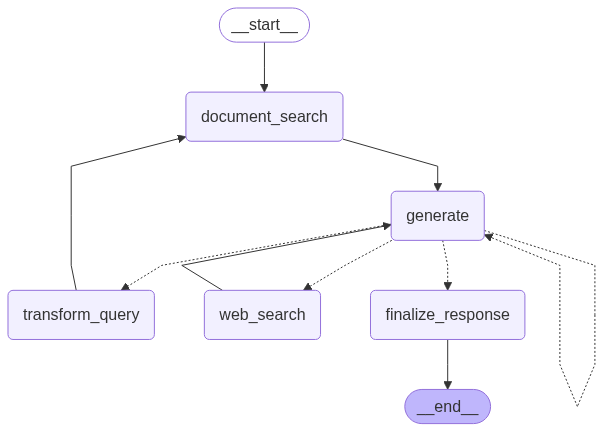

In [19]:
## Import dependencies
import re
from typing import Annotated, Iterator, Literal, TypedDict
import openai

from langchain import hub
from langchain_community.document_loaders import web_base
from langchain_community.vectorstores import Chroma
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.documents import Document
from langchain_core.output_parsers import StrOutputParser
from langchain_core.messages import BaseMessage, AIMessage, convert_to_messages
from langchain_core.prompts import ChatPromptTemplate
#from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel, Field
from langchain_core.retrievers import BaseRetriever
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from langgraph.graph import END, StateGraph, add_messages, MessagesState
#from langgraph.checkpoint import MemorySaver





# setting up client to store/send data to database
from timescale_vector import client
import os

OPENAI_API_KEY   = os.getenv("OPENAI_API_KEY")
TIMESCALE_DB_URI = os.getenv("TIMESCALE_DB_URI")
TAVILY_API_KEY   = os.getenv("TAVILY_API_KEY")

# query = "Explain The uncertainty principle in Quantum Mechanics"

# query_embedding = openai.embeddings.create(
#                                             input=[query],  # input can be a single string or list of strings
#                                             model="text-embedding-3-small"
#                                             )

table_name     = 'embeddings_table'
embedding_dims = 1536

# creating client to handle db operations
vec_client = client.Sync(
                        TIMESCALE_DB_URI,
                        table_name,
                        embedding_dims
                    )




## Set up model, retriever (get_docs(...)) & tools
NEWLINE_RE = re.compile("\n+")

def get_docs(question: str, documents: list[Document]) -> list[Document]:
    
    query_embedding = openai.embeddings.create(
                                            input=[question],  # input can be a single string or list of strings
                                            model="text-embedding-3-small"
                                            )
    results   = vec_client.search(query_embedding.data[0].embedding, limit=5)

    for row in results:
        documents.append(Document(page_content=row[2], metadata=row[1]))
    return documents

    


#from langchain_openai import ChatOpenAI
# Initialize the model
llm    = ChatOpenAI(model="gpt-4.1-nano-2025-04-14", temperature=0)
tavily_search_tool = TavilySearchResults(max_results=3)



# ################################################################################################################
# ## Set up graph state
# class GraphState(MessagesState):
#     question:         str
#     documents:        list[Document]
#     candidate_answer: str
#     retries:          int
#     web_fallback:     bool

# class GraphConfig(TypedDict):
#     max_retries: int
# ################################################################################################################




## Set up graph nodes
### Document search
MAX_RETRIES = 3
VERBOSE     = True


def document_search(state: GraphState):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    if VERBOSE:
        print("---RETRIEVE---")
        
    question = str(convert_to_messages(state["messages"])[-1].content)
    # Retrieval
    documents = get_docs(question, state.get("documents", [])) # if docs exist we get them otherwise we'll pass in an empty list
    question  = convert_to_messages(state["messages"])[-1].content    
    return {"documents": documents, "question": question, "web_fallback": True}




## Generate answer
RAG_PROMPT: ChatPromptTemplate = hub.pull("rlm/rag-prompt")
def generate(state: GraphState):
    """
    Generate answer
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    if VERBOSE:
        print("---GENERATE---")
    question  = state["question"]
    documents = state["documents"]
    retries   = state["retries"] if state.get("retries") is not None else -1

    rag_chain  = RAG_PROMPT | llm | StrOutputParser()
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"retries": retries + 1, "candidate_answer": generation}
# ye warning bhi deti hay: 
# """"
# C:\Users\Ans\Desktop\code\10_agentic_project\.venv\lib\site-packages\langsmith\client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
#   warnings.warn(
# """
# print(RAG_PROMPT)




## Rewrite question
QUERY_REWRITER_SYSTEM = (
"""
You a question re-writer that converts an input question to a better version that is optimized for vectorstore retrieval.
Look at the input and try to reason about the underlying semantic intent / meaning.
"""
)
QUERY_REWRITER_PROMPT = ChatPromptTemplate.from_messages(
    [
        ("system", QUERY_REWRITER_SYSTEM),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)
def transform_query(state: GraphState):
    """
    Transform the query to produce a better question.
    Args:
        state (dict): The current graph state
    Returns:
        state (dict): Updates question key with a re-phrased question
    """
    if VERBOSE:
        print("---TRANSFORM QUERY---")
    question = state["question"]
    # Re-write question
    query_rewriter  = QUERY_REWRITER_PROMPT | llm | StrOutputParser()
    better_question = query_rewriter.invoke({"question": question})
    return {"question": better_question}




## Web search
def web_search(state: GraphState):
    if VERBOSE:
        print("---RUNNING WEB SEARCH---")
    question  = state["question"]
    documents = state["documents"]
    search_results = tavily_search_tool.invoke(question)
    search_content = "\n".join([d["content"] for d in search_results])
    
    documents.append(Document(page_content=search_content, metadata={"source": "websearch"})) # i hope document sahi format main hoon gay
    return {"documents": documents, "web_fallback": False}





## Finalize response
def finalize_response(state: GraphState):
    if VERBOSE:
        print("---FINALIZING THE RESPONSE---")

    return {"messages": [AIMessage(content=state["candidate_answer"])]}





## Set up edges
# Grade answer
#     Check hallucinations
#     Check answer relevance
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


HALLUCINATION_GRADER_SYSTEM = (
"""
You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts.
Give a binary score 'yes' or 'no', where 'yes' means that the answer is grounded in / supported by the set of facts.

IF the generation includes code examples, make sure those examples are FULLY present in the set of facts, otherwise always return score 'no'.
"""
)

HALLUCINATION_GRADER_PROMPT = ChatPromptTemplate.from_messages(
    [
        ("system", HALLUCINATION_GRADER_SYSTEM),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)


class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


ANSWER_GRADER_SYSTEM = (
"""
You are a grader assessing whether an answer addresses / resolves a question.
Give a binary score 'yes' or 'no', where 'yes' means that the answer resolves the question.
"""
)

ANSWER_GRADER_PROMPT = ChatPromptTemplate.from_messages(
    [
        ("system", ANSWER_GRADER_SYSTEM),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)




def grade_generation_v_documents_and_question(state: GraphState, config) -> Literal["generate", "transform_query", "web_search", "finalize_response"]:
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """
    question     = state["question"]
    documents    = state["documents"]
    generation   = state["candidate_answer"]
    web_fallback = state["web_fallback"]
    retries      = state["retries"] if state.get("retries") is not None else -1
    max_retries  = config.get("configurable", {}).get("max_retries", MAX_RETRIES)

    # this means we've already gone through web fallback and can return to the user
    if not web_fallback:
        return "finalize_response"

    if VERBOSE:
        print("---CHECK HALLUCINATIONS---")

    hallucination_grader = HALLUCINATION_GRADER_PROMPT | llm.with_structured_output(GradeHallucinations)
    hallucination_grade: GradeHallucinations = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )

    # Check hallucination
    if hallucination_grade.binary_score == "no":
        if VERBOSE: print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "generate" if retries < max_retries else "web_search"

    if VERBOSE:
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        print("---GRADE GENERATION vs QUESTION---")

    # Check question-answering
    answer_grader = ANSWER_GRADER_PROMPT | llm.with_structured_output(GradeAnswer)
    answer_grade: GradeAnswer = answer_grader.invoke({"question": question, "generation": generation})
    if answer_grade.binary_score == "yes":
        if VERBOSE: print("---DECISION: GENERATION ADDRESSES QUESTION---")
        return "finalize_response"
    else:
        if VERBOSE: print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
        return "transform_query" if retries < max_retries else "web_search"





## Assemble graph
self_crag_builder = StateGraph(GraphState, config_schema=GraphConfig)

# Define the nodes
self_crag_builder.add_node("document_search",   document_search)
self_crag_builder.add_node("generate",          generate)
self_crag_builder.add_node("transform_query",   transform_query)
self_crag_builder.add_node("web_search",        web_search)
self_crag_builder.add_node("finalize_response", finalize_response)

# Build graph
self_crag_builder.set_entry_point("document_search")
self_crag_builder.add_edge("document_search",   "generate")
self_crag_builder.add_edge("transform_query",   "document_search")
self_crag_builder.add_edge("web_search",        "generate")
self_crag_builder.add_edge("finalize_response", END)

self_crag_builder.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question
)

# Compile
self_crag = self_crag_builder.compile()




## Visualize graph
from IPython.display import Image, display
display(Image(self_crag.get_graph().draw_mermaid_png()))




# # Run the graph!
# ## Streaming
# VERBOSE = True
# # here it wont fall back to web search, the naswer is present in the chapter
# inputs = {"messages": [("human", "explain uncertainty priciple in quantum mechanics")]}
# for output in self_crag.stream(inputs):
#     print("\n---\n")
# #output



# # here it'll fall back to web search after retrying for 3 to 4 times
# VERBOSE = False
# inputs = {"messages": [("human", "explain diffraction in crystals")]}
# for output in self_crag.stream(inputs):
#     print(output)
#     print("\n---\n")

In [20]:
VERBOSE = True
inputs = {"messages": [("human", "explain uncertainty priciple in quantum mechanics")]}
for output in self_crag.stream(inputs):
    print("\n---\n")
    

---RETRIEVE---

---

---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---

---

---FINALIZING THE RESPONSE---

---



In [21]:
output

{'finalize_response': {'messages': [AIMessage(content='The uncertainty principle in quantum mechanics states that it is impossible to simultaneously know both the exact position and momentum of a particle, such as an electron. This is expressed mathematically as ∆x ≥ ℏ/2∆p, meaning increasing precision in one measurement decreases the accuracy of the other. It reflects a fundamental limit of nature, not just experimental difficulty, and is essential for the consistency of quantum theory.', additional_kwargs={}, response_metadata={}, id='f563953d-b8cb-47a5-b732-0388eddfa52a')]}}

In [7]:
VERBOSE = False
inputs = {"messages": [("human", "explain diffraction in crystals")]}
for output in self_crag.stream(inputs):
    print(output)
    print("\n---\n")

{'document_search': {'documents': [Document(metadata={'subject': 'Physics', 'book_name': 'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics', 'word_count': 501, 'author_name': 'Richard Feynman', 'page_number': 40, 'sub_subject': 'Quantum Mechanics'}, page_content='by without being seen. There did not happen to be a photon around at the time\nthe electron went through.\nThis is all a little discouraging. If it is true that whenever we “see” the electron\nwe see the same-sized ﬂash, then those electrons we see are always the disturbed\nones. Let us try the experiment with a dim light anyway. Now whenever we\nhear a click in the detector we will keep a count in three columns: in Column (1)\nthose electrons seen by hole 1, in Column (2) those electrons seen by hole 2,\nand in Column (3) those electrons not seen at all. When we work up our data\n(computing the probabilities) we ﬁnd these results: Those “seen by hole 1” have\na distribution like P ′\n1; those “seen by hole 2” have 

In [11]:
VERBOSE = False
inputs = {"messages": [("human", "explain diffraction in crystals")]}
async for event in self_crag.astream_events(inputs, version="v2"):
    if event["event"] == "on_chat_model_stream":
        event["data"]["chunk"].pretty_print()


In [12]:
event

{'event': 'on_chain_end',
 'data': {'output': {'messages': [HumanMessage(content='explain diffraction in crystals', additional_kwargs={}, response_metadata={}, id='c4c8a8ed-40c5-4f39-bcc1-7dd94fd49b90'),
    AIMessage(content="Diffraction in crystals occurs when waves, such as X-rays or electrons, encounter the regular, repeating atomic structure of a crystal, causing them to bend and interfere. This interference produces specific patterns that can be observed and analyzed to determine the crystal's atomic arrangement. It is a wave phenomenon that reveals the internal structure of crystals through the resulting diffraction patterns.", additional_kwargs={}, response_metadata={}, id='bd62bdfc-7f7a-444f-8313-c15f5c17d7c4')],
   'question': 'explain diffraction in crystals',
   'documents': [Document(metadata={'subject': 'Physics', 'book_name': 'The Feynman Lectures on Physics - Vol 3 - Quantum Mechanics', 'word_count': 501, 'author_name': 'Richard Feynman', 'page_number': 40, 'sub_subject